This article focuses on common analysis of stock prices for some of the major US banks. We will use Python language for data extraction, exploration and visualization. 

## Goal

We will look at trends in bank stocks during the [financial crisis of 2007–2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) and how they are progressing a decade after that. 

Since this is an introductory tutorial, we will confine ourselves to simple statistical techniques only.

First we'll extract the historical stock prices from yahoo finance for following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
* HSBC

Then given that we have data, we will look at following quantities:

- Adjusted Close price 
- Daily percentage change 
- Monthly return and volatility 

### Get the Data

In [4]:
from pandas_datareader import DataReader
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
#tickers of a few largest finance companies
start = date(2006, 1, 1)

# Bank of America
BAC = DataReader("BAC", 'yahoo', start)

# CitiGroup
C = DataReader("C", 'yahoo', start)

# Goldman Sachs
GS = DataReader("GS", 'yahoo', start)

# JPMorgan Chase
JPM = DataReader("JPM", 'yahoo', start)

# Morgan Stanley
MS = DataReader("MS", 'yahoo', start)

# Wells Fargo
WFC = DataReader("WFC", 'yahoo', start)

# HSBC
HSBC = DataReader("HSBC", 'yahoo', start)

In [6]:
tickers = ['BAC','C','GS','JPM','MS','WFC','HSBC']
stocks = pd.concat([BAC, C, GS, JPM, MS, WFC, HSBC], axis=1, keys=tickers)
stocks.columns.names = ['Ticker','Info']
stocks.head()

Ticker            BAC                                                        \
Info             Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  37.000080  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  36.607124  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  36.654278  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  36.599277  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  36.622845  15619400   

Ticker               C                                       ...          WFC  \
Info              Open        High         Low       Close   ...          Low   
Date                                                         ...                
2006-01-03  490.000000  493.799988  481.100006  492.899994   ...    31.195000   
2006-01-04  488.600006  491.000000  483.500000  483.799988   ...    31.365000   
2006-01-05  484.399994  487.799988  484.000000  486.200012   ...    31.309999   
2006-01-06  488.799988  489.000000  482.000000  486.200012   ...    31.385000   
2006-01-09  486.000000  487.399994  483.000000  483.899994   ...    31.555000   

Ticker                                           HSBC                        \
Info            Close  Adj Close    Volume       Open       High        Low   
Date                                                                          
2006-01-03  31.900000  23.077190  11016400  81.089996  81.889999  80.849998   
2006-01-04  31.530001  22.809519  10870000  82.000000  82.190002  81.940002   
2006-01-05  31.495001  22.784204  10158000  82.440002  82.879997  82.430000   
2006-01-06  31.680000  22.918036   8403800  83.529999  84.180000  83.529999   
2006-01-09  31.674999  22.914423   5619600  85.400002  85.750000  85.400002   

Ticker                                    
Info            Close  Adj Close  Volume  
Date                                      
2006-01-03  81.680000  44.141685  643200  
2006-01-04  81.980003  44.303818  478700  
2006-01-05  82.639999  44.660492  558900  
2006-01-06  84.029999  45.411671  882200  
2006-01-09  85.519997  46.216900  768100  

[5 rows x 42 columns]

### Visualize Stock Prices

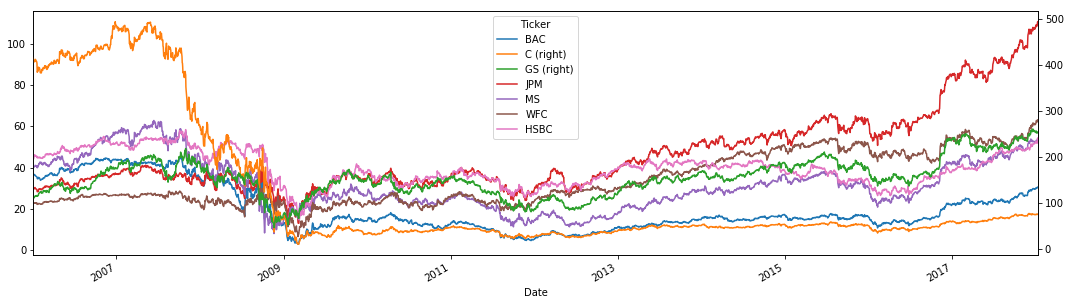

In [8]:
#plot stock prices
stocks.xs(key='Adj Close',axis=1,level='Info').plot(figsize=(18,5), secondary_y = ["C", "GS"])
plt.show()

We can clearly see in this chart, a sharp dip representing the infamous [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) of 2007-2008. Also, it's interesting to note how the major banks like Goldman Sachs (green), JPMorgan Chase (red), Wells Fargo (brown) etc. bounce quicker than few others.

## Daily Percentage Change

It's defined as relative change in adjusted closing stock prices between two consecutive days:

$$r_t = \frac{p_t}{p_{t-1}} - 1$$

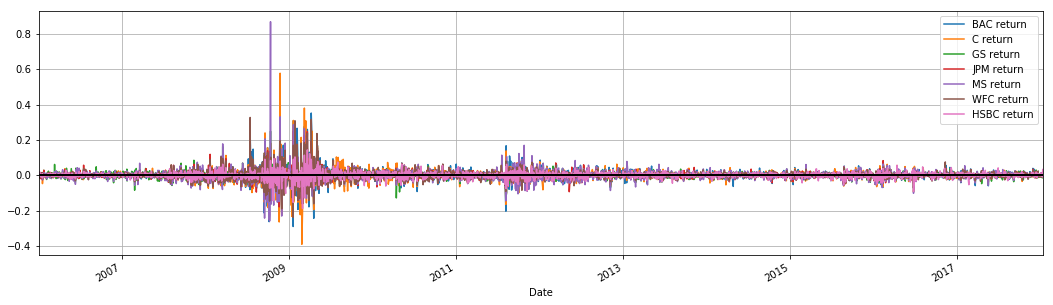

In [12]:
# daily returns
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' return'] = stocks[tick]['Adj Close'].pct_change()

returns.plot(figsize=(18,5), label=tickers, grid = True).axhline(y = 0, color = "black", lw = 2)
plt.show()

## Volatility of a stock

[Volatility](https://www.investopedia.com/terms/v/volatility.asp#ixzz53tIqsUVc) is a statistical measure of the dispersion of returns of a given stock. It can be defined by the standard deviation or variance between returns of a stock over a specific period of time.

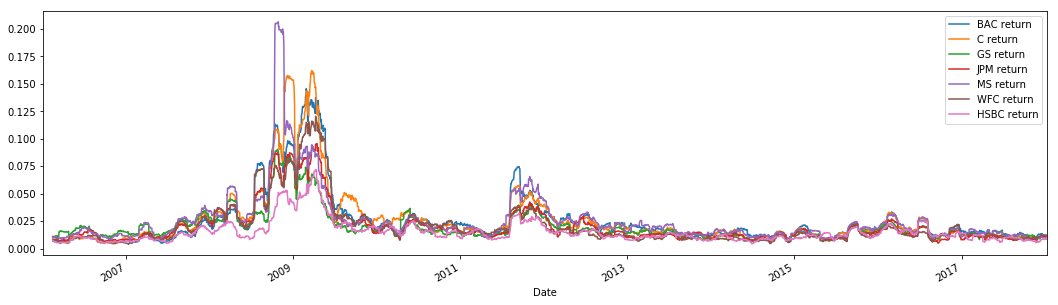

In [13]:
# calculate the volatility for each month starting 2006
vol = returns.rolling(30).std() 
vol.plot(figsize=(18, 5))
plt.legend()
plt.show()

By comparing the volatility of a stock with another stock, we can get a feel of the risk. Generally, the higher the volatility, the riskier the investment in that stock is. Note that the volatility is much higher during 2008-recession and around [Aug-2011](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), but after 2017, market seems quite stable!

**Disclaimer: This article should be used for learning purposes only and not as a financial advice. **